### Limpieza de Datos:
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [3]:
ruta_archivo = "csv\diabetes.csv"
df = pd.read_csv(ruta_archivo)
df.head().T

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\BJ\AppData\Local\Temp\ipykernel_3556\4184201575.py:1: SyntaxWarning: invalid escape sequence '\d'
  ruta_archivo = "csv\diabetes.csv"


,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [4]:
# Identificación de valores duplicados
df.duplicated().sum()

0

In [5]:
# Verificación y ajuste de tipos de datos
data_types = df.dtypes
data_types

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Manejo de valores faltantes
# En este dataset, valores como 0 en columnas como 'Glucose', 'BloodPressure', etc., pueden ser considerados faltantes.
columnas_faltantes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columnas_faltantes:
    df[col] = df[col].replace(0, df[col].median())

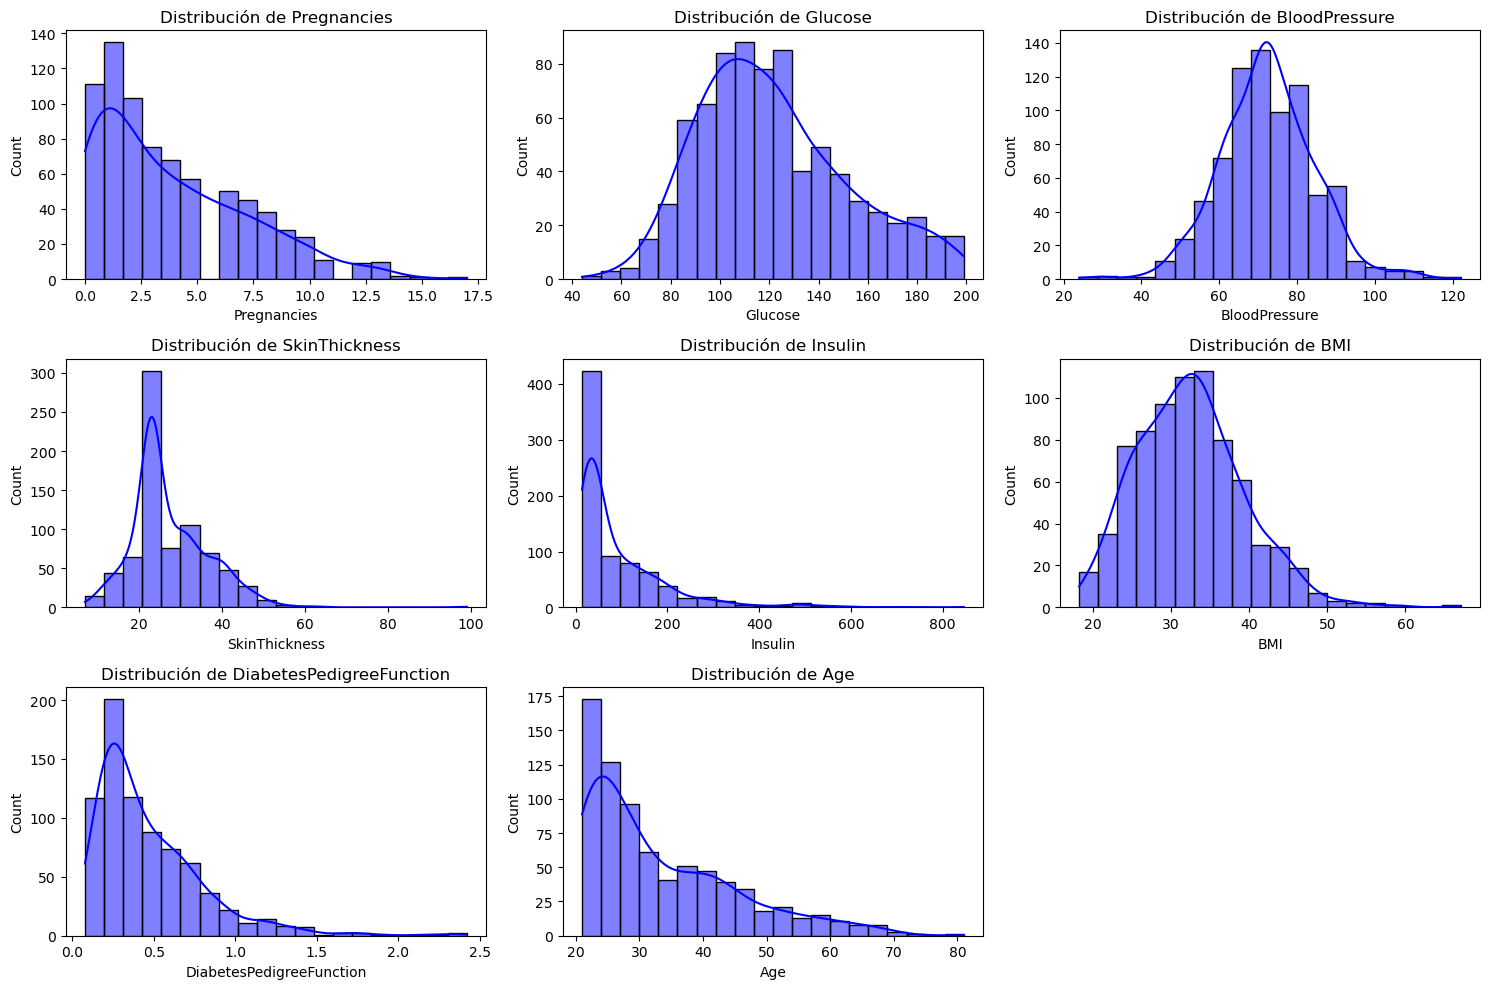

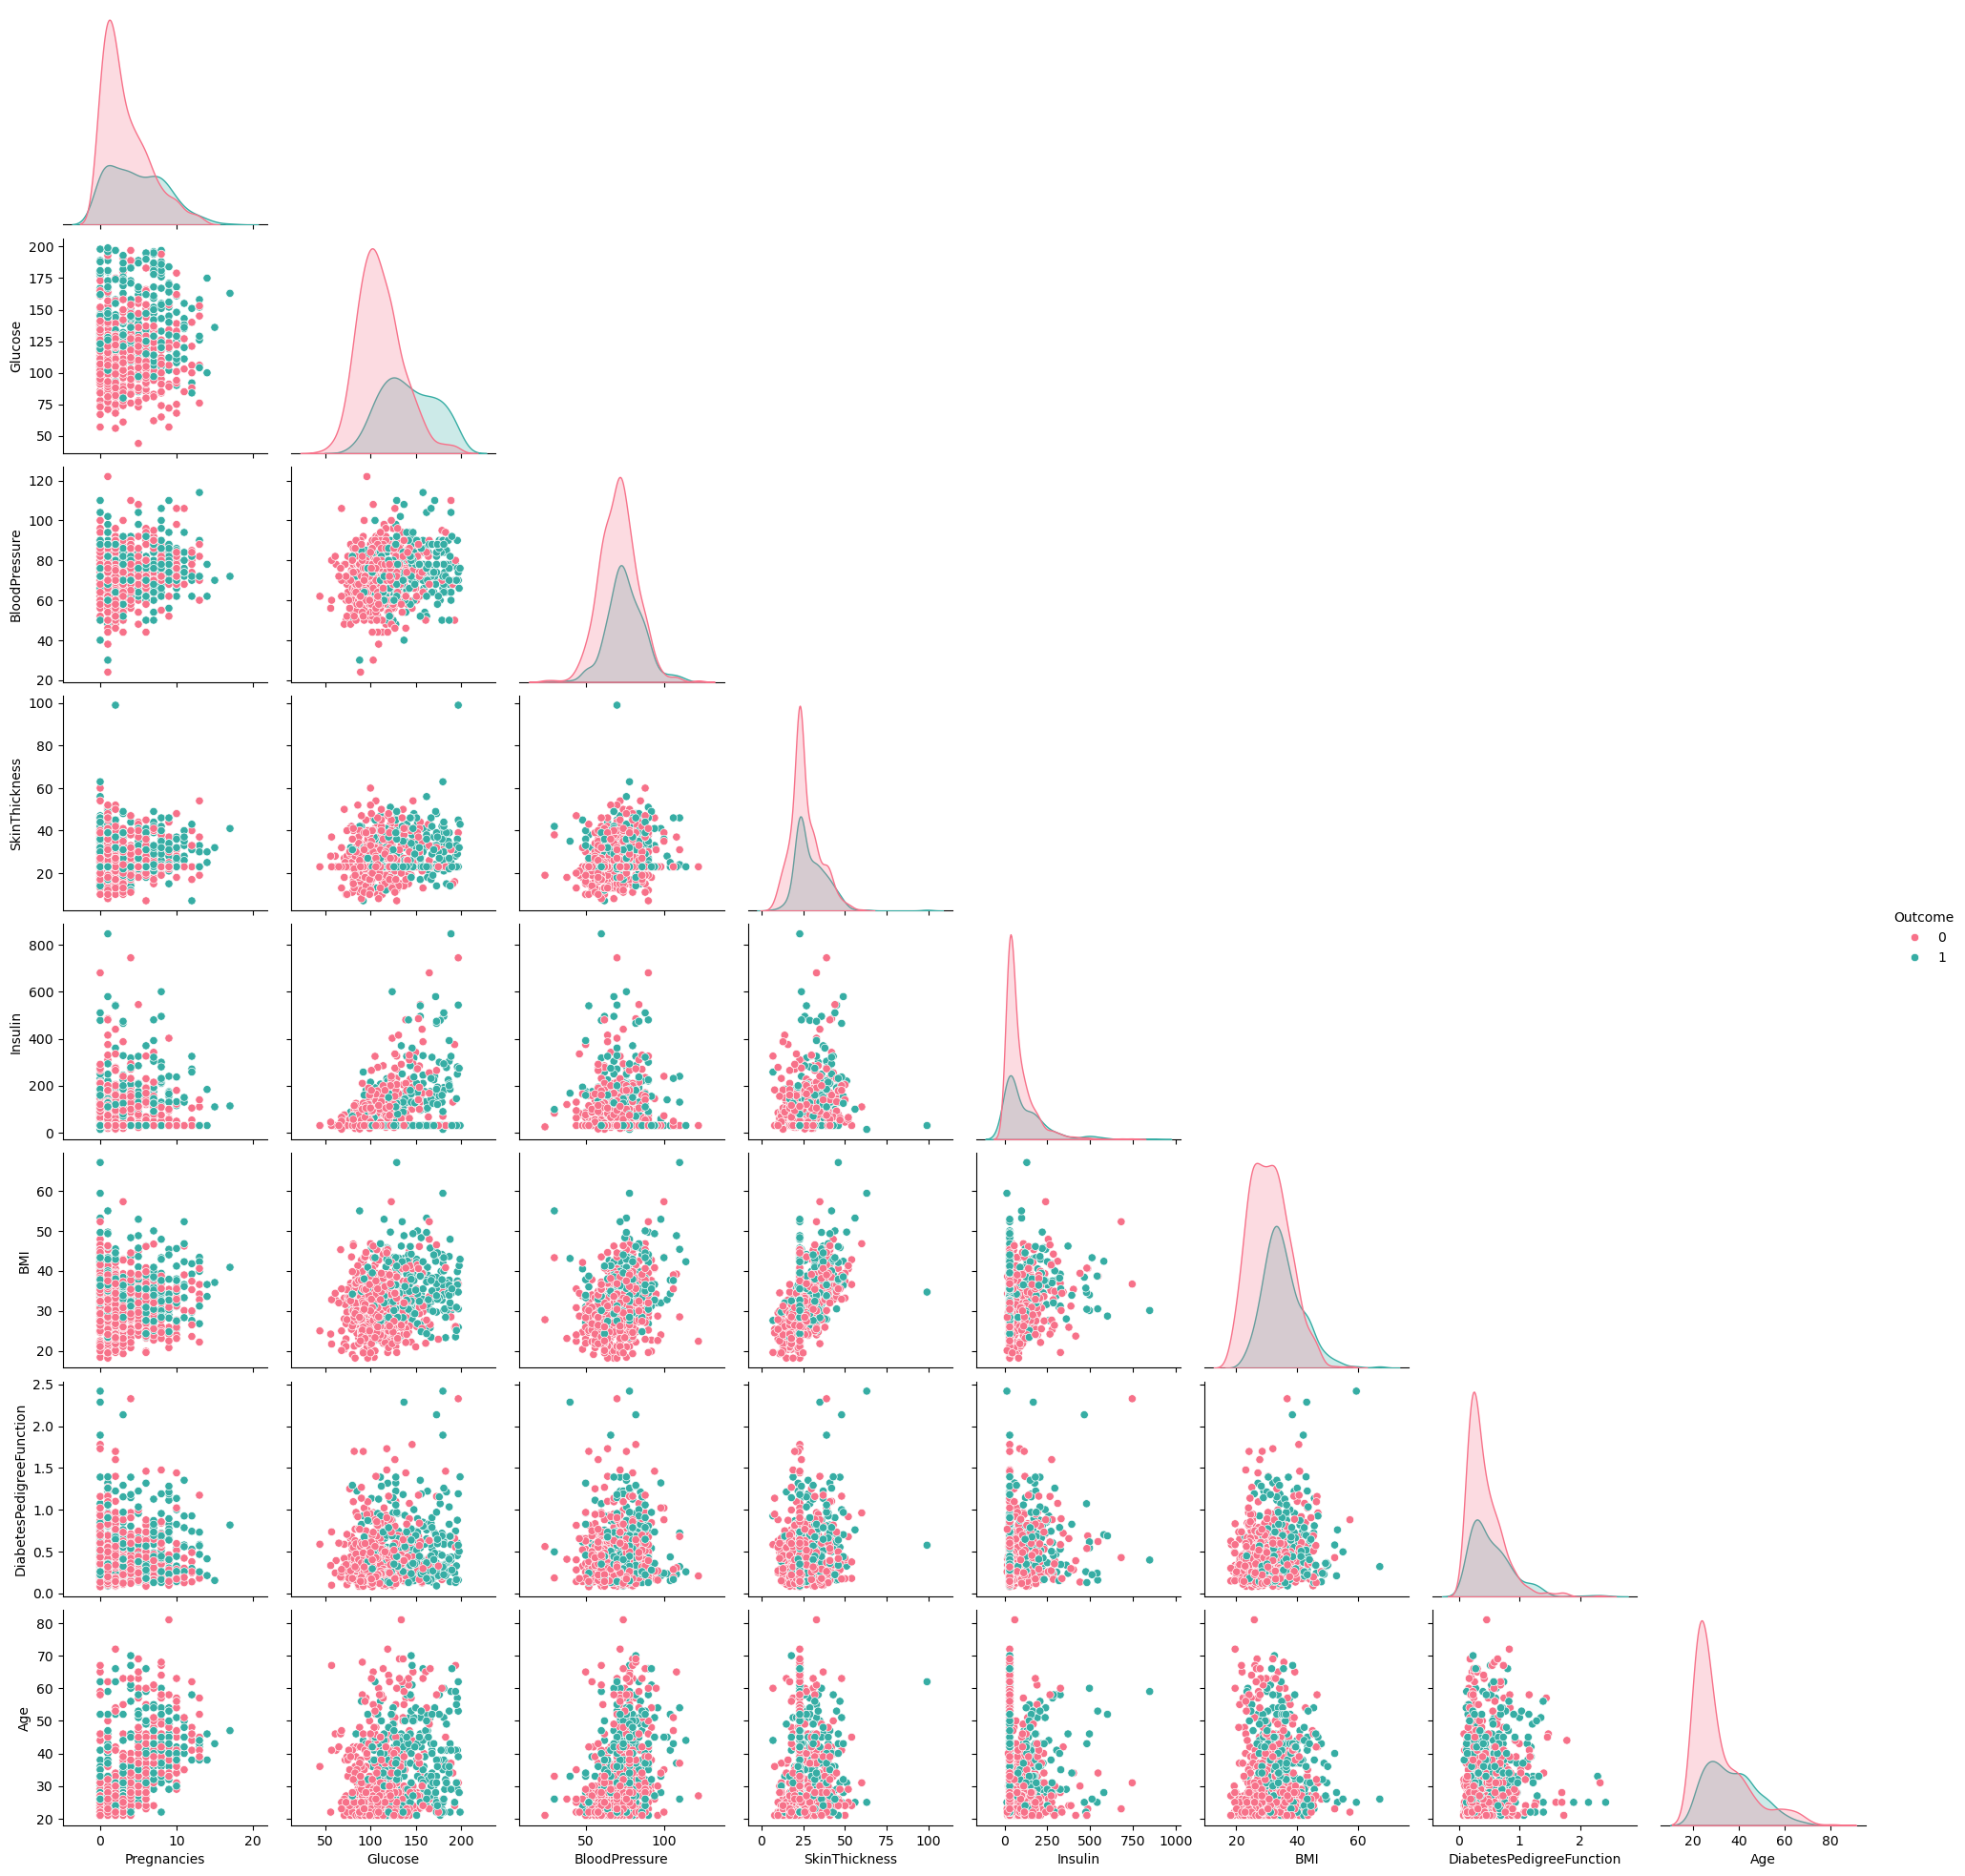

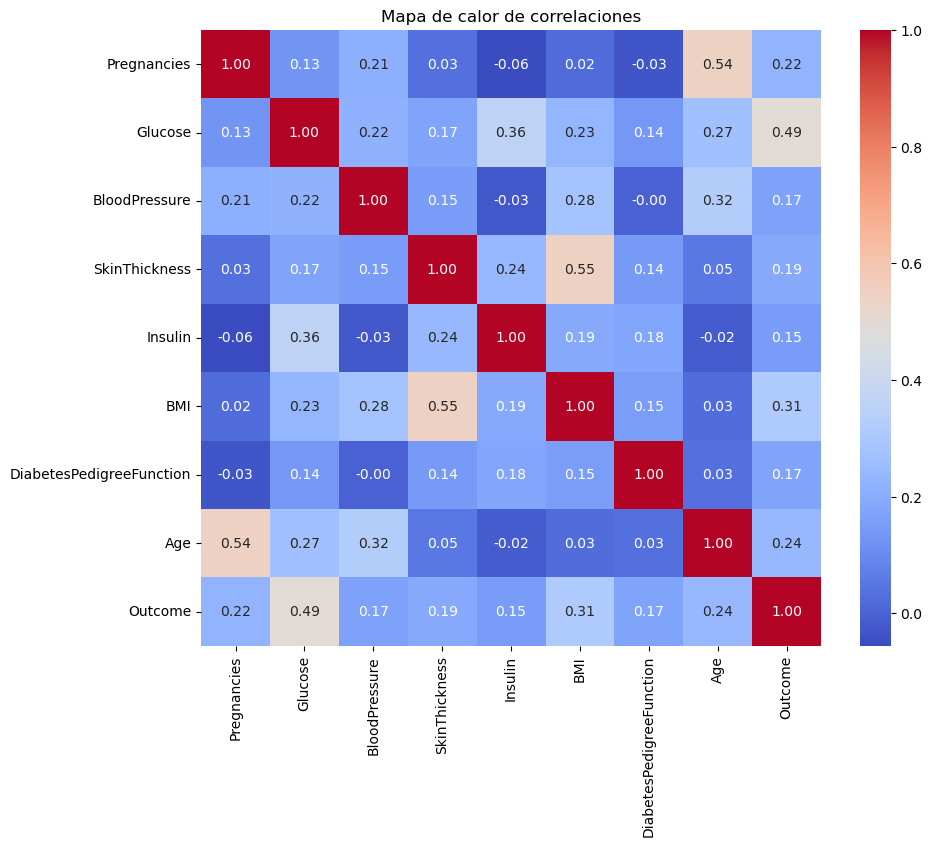

In [7]:
# Visualizaciones univariadas
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):  # Excluimos 'Outcome' (variable de salida)
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

# Visualización multivariada - Diagrama de dispersión de pares
sns.pairplot(df, hue="Outcome", diag_kind="kde", corner=True, palette="husl")
plt.show()

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de calor de correlaciones")
plt.show()


c:\Users\BJ\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:11:06] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\BJ\AppData\Local\Temp\ipykernel_3556\3951286044.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


Comparación de Modelos:
           Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Random Forest  0.740260   0.666667  0.518519  0.583333  0.689259
1        XGBoost  0.757576   0.676056  0.592593  0.631579  0.719630


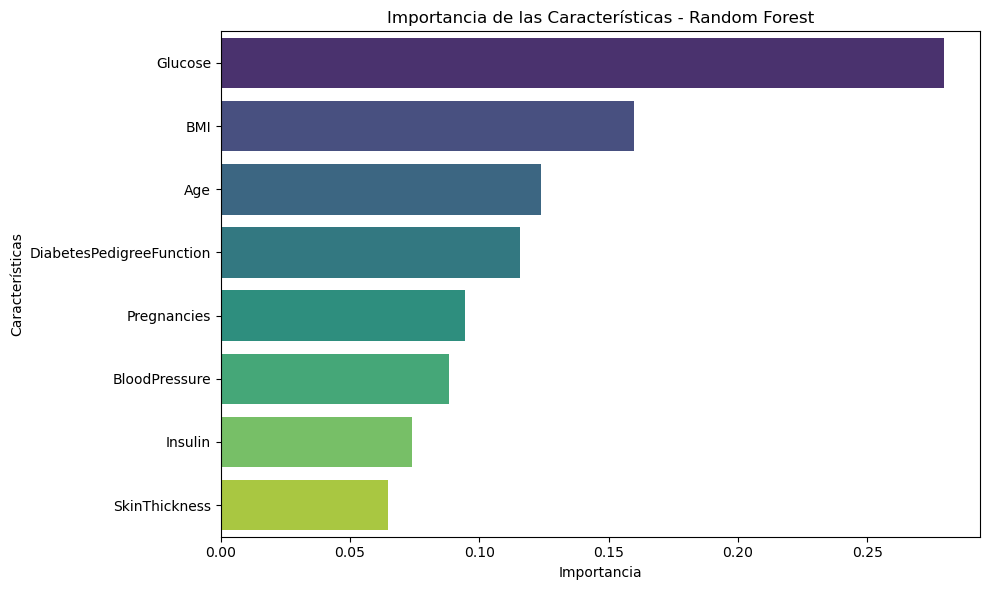


Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

 No Diabetes       0.77      0.86      0.81       150
    Diabetes       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231


Reporte de Clasificación - XGBoost:
              precision    recall  f1-score   support

 No Diabetes       0.79      0.85      0.82       150
    Diabetes       0.68      0.59      0.63        81

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [8]:
# Separar variables predictoras y objetivo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Función para evaluar modelos
def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred)
    }

# Evaluar ambos modelos
rf_results = evaluate_model(y_test, rf_predictions, 'Random Forest')
xgb_results = evaluate_model(y_test, xgb_predictions, 'XGBoost')

# Comparación de resultados
comparison = pd.DataFrame([rf_results, xgb_results])
print("Comparación de Modelos:")
print(comparison)

# Importancia de las características para Random Forest
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importancia de las Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.tight_layout()
plt.show()

# Reporte de clasificación para ambos modelos
print("\nReporte de Clasificación - Random Forest:")
print(classification_report(y_test, rf_predictions, target_names=['No Diabetes', 'Diabetes']))
print("\nReporte de Clasificación - XGBoost:")
print(classification_report(y_test, xgb_predictions, target_names=['No Diabetes', 'Diabetes']))